<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#A9A9A9;overflow:hidden;font-weight:500"><b>Coursera </b><br>Exploratory Data Analysis (EDA)</div>

<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#B2BEB5;overflow:hidden;font-weight:500">Introduction</div>


<a id="1"></a>
## 🔍 1. Introduction

### **1.1. Notebook content**
[1. Introduction](#1) <br>
    [1.1. Notebook content](#1)<br>
    [1.2. Data & Context](#1)<br>
[2. Data cleaning & basic exploration](#2) <br>
    [2.1. Data Transformation](#21) <br>
    [2.2. Missing values & duplicates](#22) <br>
    [2.3. Outliers](#23) <br>
[3. Data exploration](#3) <br>
    [3.1. Organizations](#3) <br>
    [3.2. Courses](#32) <br>
    [3.3. Correlations](#33) <br>
[4. Findings & Insights](#4) <br>
    [4.1. Key findings](#4) <br>
    [4.2. Business insights](#4) <br>
    [4.3. Further analysis possibilities](#43) <br>

### **1.2. Data & Context**

Coursera is an online course provider offering which offering online courses, certifications, and degress on varying topics from organizations and universities around the world. 

The data was scrapped and collected in 2020. <br>
**Data source:** __[Coursera Course Dataset](https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset?select=coursea_data.csv)__

**Columns:** <br>
- **course_title** : contains the course title.
- **course_organization** : which organization is conducting the courses.
- **course_Certificate_type** : details about what are the different certifications available in courses.
- **course_rating** : the ratings associated with each course.
- **course_difficulty** : difficulty or the level of the course.
- **course_students_enrolled** : number of students that are enrolled in the course.



<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#B2BEB5;overflow:hidden;font-weight:500">Data cleaning & basic exploration</div>

<a id="2"></a>
## 🧮 2. Data cleaning & basic exploration


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

df = pd.read_csv("/Users/lisaschneider/Documents/Turing College/GitHub Projects/Coursera EDA Python/coursera_data.csv", index_col=0)


In [63]:
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.70,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.70,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.50,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.70,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.80,Mixed,320k


In [64]:
df_size = df.shape
print(f"The dataset contains {df_size[0]} rows and {df_size[1]} columns.")

The dataset contains 891 rows and 6 columns.


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


All columns seemingly contain no null values. <br>
Most datateype classifications are correct. However, **course_students_enrolled** is classified as a string, which should be an integer and will need to be transformed. 
<br>
<br>
<a id="21"></a>
### **2.1. Data Transformation**
<div style="font-size:120%;color:#8e9890;font-weight:500; font-style:italic">▶️ Transforming string values to integers for number of enrolled students</div>

In [66]:
df['course_students_enrolled'].unique()

array(['5.3k', '17k', '130k', '91k', '320k', '39k', '350k', '2.4k', '61k',
       '12k', '4k', '13k', '11k', '27k', '110k', '6.6k', '540k', '22k',
       '2.9k', '80k', '9.9k', '23k', '9.2k', '78k', '190k', '35k', '29k',
       '14k', '21k', '94k', '69k', '40k', '220k', '150k', '18k', '270k',
       '7.9k', '30k', '36k', '20k', '8.1k', '120k', '71k', '63k', '42k',
       '480k', '97k', '200k', '180k', '4.2k', '310k', '3.9k', '79k',
       '31k', '15k', '10k', '66k', '33k', '56k', '7.3k', '9.7k', '210k',
       '28k', '6.5k', '55k', '2.3k', '8.8k', '88k', '1.9k', '68k', '1.6k',
       '9.5k', '57k', '26k', '84k', '95k', '5.8k', '24k', '67k', '280k',
       '38k', '77k', '510k', '89k', '48k', '160k', '32k', '340k', '82k',
       '790k', '19k', '51k', '4.8k', '37k', '43k', '6.4k', '49k', '240k',
       '46k', '7.8k', '75k', '81k', '140k', '5.5k', '99k', '100k', '3k',
       '830k', '740k', '60k', '96k', '690k', '44k', '4.5k', '8.2k', '16k',
       '300k', '8k', '41k', '54k', '9k', '380k',

Most values are written as e.g. '32k', a few written as millions, e.g. '1.3m'.<br> 
The column therefore can't be simply transformed from a string to an integer. Instead, will try to a replace function and then transform to integers. 

In [67]:
def convert_enrollment(value):
    '''Returning integers from string values written with 'k' and 'm' abbreviations'''
    if 'k' in value:
        return int(float(value.replace('k', ''))*1000)
    elif 'm' in value:
        return int(float(value.replace('m', ''))*1000000)
    else:
        return int(value)

df['course_students_enrolled'] = df['course_students_enrolled'].apply(convert_enrollment)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 48.7+ KB


In [68]:
df['course_students_enrolled'].unique()

array([   5300,   17000,  130000,   91000,  320000,   39000,  350000,
          2400,   61000,   12000,    4000,   13000,   11000,   27000,
        110000,    6600,  540000,   22000,    2900,   80000,    9900,
         23000,    9200,   78000,  190000,   35000,   29000,   14000,
         21000,   94000,   69000,   40000,  220000,  150000,   18000,
        270000,    7900,   30000,   36000,   20000,    8100,  120000,
         71000,   63000,   42000,  480000,   97000,  200000,  180000,
          4200,  310000,    3900,   79000,   31000,   15000,   10000,
         66000,   33000,   56000,    7300,    9700,  210000,   28000,
          6500,   55000,    2300,    8800,   88000,    1900,   68000,
          1600,    9500,   57000,   26000,   84000,   95000,    5800,
         24000,   67000,  280000,   38000,   77000,  510000,   89000,
         48000,  160000,   32000,  340000,   82000,  790000,   19000,
         51000,    4800,   37000,   43000,    6400,   49000,  240000,
         46000,    7

Column **course_students_enrolled** is now correctly classified as int64 datatype and checking unique values also looks correct. 

In [69]:
pd.set_option('display.float_format', '{:,.02f}'.format) # preventing pandas to show large numbers in scinetific notion (e.g. 8.910000e+02)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
course_rating,891.00,4.68,0.16,3.30,4.60,4.70,4.80,5.00
course_students_enrolled,891.00,"90,552.08","181,936.45","1,500.00","17,500.00","42,000.00","99,500.00","3,200,000.00"


Mean course rating overall is 4.68 which is fairly high on a scale 0-5. 

In [70]:
df.describe(include=['object']).T

,count,unique,top,freq
course_title,891,888,Marketing Digital,2
course_organization,891,154,University of Pennsylvania,59
course_Certificate_type,891,3,COURSE,582
course_difficulty,891,4,Beginner,487


University of Pennsylvania is the most frequent organization with 59 courses. 'Course' is the most frequent certificate type (65%) and 'Beginner' the most frequent difficulty (55%).

<a id="22"></a>
### **2.2. Missing values & duplicates**

In [71]:
df.isnull().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [72]:
df.duplicated().value_counts()

False    891
Name: count, dtype: int64

No missing values or duplicated rows in the dataset. 
<br>
Checking string columns for duplicates or data entries that need cleaning below.

In [73]:
sorted(df['course_organization'].unique())

['(ISC)²',
 'Amazon Web Services',
 'American Institute of Business and Economics',
 'American Museum of Natural History',
 'Arizona State University',
 'Atlassian',
 'Autodesk',
 'Automation Anywhere',
 'BCG',
 'Berklee College of Music',
 'Birkbeck, University of London',
 'Bloomsbury Learning Exchange',
 'California Institute of the Arts',
 'Case Western Reserve University',
 'Cisco',
 'Cloudera',
 'Columbia University',
 'ConsenSys Academy',
 'Copenhagen Business School',
 'Crece con Google',
 'Duke University',
 'E-Learning Development Fund',
 'EDHEC Business School',
 'ESADE Business and Law School',
 'ESCP Business School',
 'ESSEC Business School',
 'Eindhoven University of Technology',
 'Emory University',
 'Erasmus University Rotterdam',
 'Fundação Instituto de Administração',
 'Georgia Institute of Technology',
 'Goldsmiths, University of London',
 'Google',
 'Google - Spectrum Sharing',
 'Google Cloud',
 'HEC Paris',
 'Hebrew University of Jerusalem',
 'HubSpot Academy',
 '

In [74]:
df['course_Certificate_type'].unique()

array(['SPECIALIZATION', 'COURSE', 'PROFESSIONAL CERTIFICATE'],
      dtype=object)

In [75]:
df['course_difficulty'].unique()

array(['Beginner', 'Intermediate', 'Mixed', 'Advanced'], dtype=object)

String columns look good with no values that need to be further cleaned or transformed. 

<a id="23"></a>
### **2.3. Outliers**
<div style="font-size:120%;color:#8e9890;font-weight:500; font-style:italic">▶️ Checking for outliers in all numeric columns</div>


In [76]:
def detect_outliers(df):
    """Return outliers outside IQR for all numerical columns"""
    numeric_cols = df.select_dtypes(
        include=["number"]
    ) 

    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1

    outliers = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))

    return outliers


outliers = detect_outliers(df)
outliers.sum()

course_rating               17
course_students_enrolled    78
dtype: int64

In [77]:
outlier_rows = df[outliers.any(axis=1)]
outlier_rows

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.80,Mixed,320000
54,AI For Everyone,deeplearning.ai,COURSE,4.80,Beginner,350000
63,Academic English: Writing,"University of California, Irvine",SPECIALIZATION,4.70,Beginner,540000
157,Advanced Data Science with IBM,IBM,SPECIALIZATION,4.40,Advanced,320000
151,An Introduction to Programming the Internet of...,"University of California, Irvine",SPECIALIZATION,4.60,Beginner,270000
...,...,...,...,...,...,...
199,Using Python to Access Web Data,University of Michigan,COURSE,4.80,Mixed,310000
42,Web Design for Everybody: Basics of Web Develo...,University of Michigan,SPECIALIZATION,4.70,Beginner,280000
88,What is Data Science?,IBM,COURSE,4.70,Beginner,260000
213,Write Professional Emails in English,Georgia Institute of Technology,COURSE,4.70,Mixed,270000


Some outliers can be detected in the numeric columns based on the interquartile ranges. <br>
<br>
However, looking at the 'outliers' and considering the min and max values for both **course_rating** and **course_students_enrolled**, these values are within a reasonable and possible range. Although 320 000 students enrolled in a course may be a mathematical outliers, it is still a rteasonable value. Therefore it does not make sense in this dataset to remove any of the outliers and they will therefore be kept. 
<br>
<br>

<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#B2BEB5;overflow:hidden;font-weight:500">Data exploration</div>

<a id="3"></a>
## 📊 3. Data exploration

#### **3.1. Organizations**
<div style="font-size:120%;color:#8e9890;font-weight:500; font-style:italic">▶️ Organizations by number of courses</div>


In [78]:
course_counts = df['course_organization'].value_counts().reset_index()
course_counts

,course_organization,count
0,University of Pennsylvania,59
1,University of Michigan,41
2,Google Cloud,34
3,Johns Hopkins University,28
4,Duke University,28
...,...,...
149,The Linux Foundation,1
150,Palo Alto Networks,1
151,MathWorks,1
152,BCG,1


154 unique course organization are represented in the dataset with 891 courses in total. 

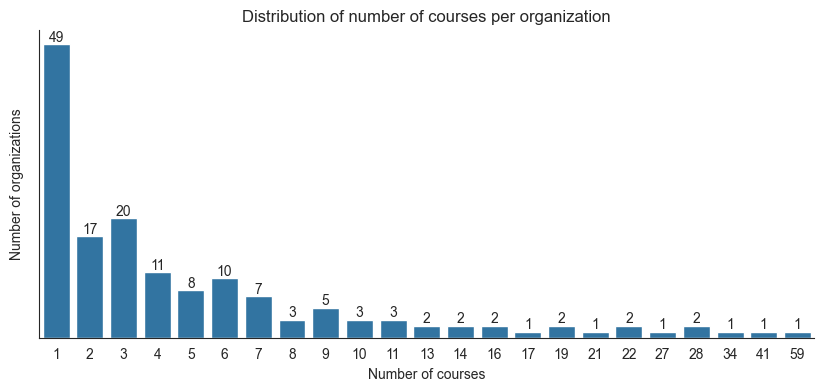

In [79]:
sns.set_style('white')
plt.figure(figsize=(10,4))
ax = sns.countplot(course_counts, x='count')
ax.bar_label(ax.containers[0])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Distribution of number of courses per organization')
plt.xlabel('Number of courses')  
plt.ylabel('Number of organizations') 
plt.show()

In [80]:
# Calculating the percentage of organizations that have 1 course only in the catalogue
org_with_one_course = (course_counts['count'] == 1).sum()
total_org = len(course_counts)
perc_one_course_org = (org_with_one_course / total_org) * 100
print(f"{perc_one_course_org:.2f}%")

31.82%


**Findings:**<br>
&#9658; Most organizations on Coursera have only 1 course in the catalogue, which is 32% of all organizations.<br>
&#9658; 3 organizations have more than 30 courses in the catalogue.  

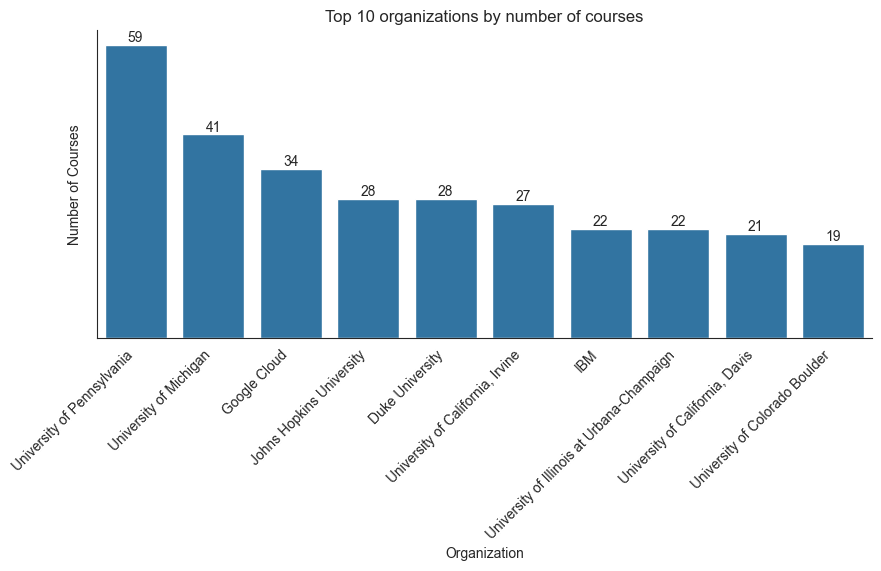

In [98]:
top_10_org = course_counts.head(10)

sns.set_style('white')
plt.figure(figsize=(10, 4))
ax = sns.barplot(top_10_org, x='course_organization', y='count')
ax.bar_label(ax.containers[0])
plt.title('Top 10 organizations by number of courses')
plt.xlabel('Organization')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45, ha='right')
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()  

**Findings:**<br>
&#9658; Among the Top 10 organizations with most courses are mostly universities (8/10) and 2 big cooperations (Google Cloud & IBM)
<br>
<br>
A resulting question to further investigate is whether the number the courses correlates in any way with the course ratings. Do organizations with more courses also have more popular courses or vice versa? <br>
👉 This will be further investigated under [3.3. Correlations](#3.3.--Correlations) <br>

<div style="font-size:120%;color:#8e9890;font-weight:500; font-style:italic">▶️ Top organizations by enrollments and ratings</div>


/var/folders/j6/b6gh915d113fbv3bgzvphpj40000gn/T/ipykernel_14282/1856593803.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
/var/folders/j6/b6gh915d113fbv3bgzvphpj40000gn/T/ipykernel_14282/1856593803.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


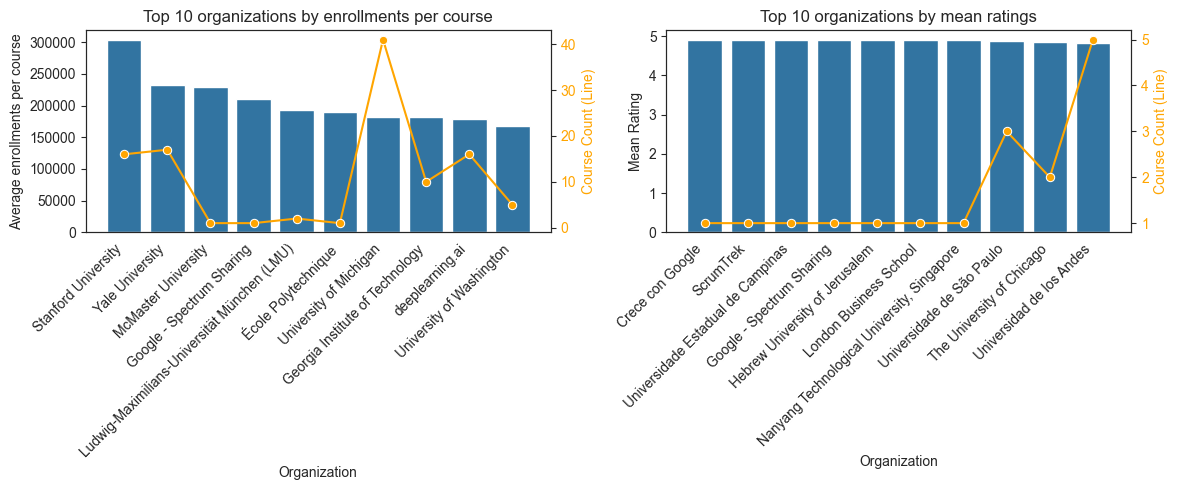

In [82]:
# Plotting the Top 10 organizations by enrollments and mean ratings
plot_enrollments = org_counts_ratings.sort_values('enrollment_per_course', ascending=False).reset_index().head(10)
plot_ratings = org_counts_ratings.sort_values('mean_rating', ascending=False).head(10)

sns.set_style('white')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# Plot 1: Bar chart for average enrollments
sns.barplot(x='course_organization', y='enrollment_per_course', data=plot_enrollments, ax=axes[0])
axes[0].set_title('Top 10 organizations by enrollments per course')
axes[0].set_xlabel('Organization')
axes[0].set_ylabel('Average enrollments per course')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


ax2_0 = axes[0].twinx()
sns.lineplot(x='course_organization', y='course_count', data=plot_enrollments, ax=ax2_0, color='orange', marker='o')
ax2_0.set_ylabel('Course Count (Line)', color='orange')
ax2_0.tick_params(axis='y', labelcolor='orange')

# Plot 2: Bar chart for average ratings
sns.barplot(x='course_organization', y='mean_rating', data=plot_ratings, ax=axes[1])
axes[1].set_title('Top 10 organizations by mean ratings')
axes[1].set_xlabel('Organization')
axes[1].set_ylabel('Mean Rating')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


ax2_1 = axes[1].twinx()
sns.lineplot(x='course_organization', y='course_count', data=plot_ratings, ax=ax2_1, color='orange', marker='o')
ax2_1.set_ylabel('Course Count (Line)', color='orange')
ax2_1.tick_params(axis='y', labelcolor='orange')

plt.tight_layout()
plt.show()

**Findings:** <br>
&#9658; Organizations with highest average enrollments have a mixed number of courses - some more well-known organizations with a higher number of courses (Stanford University, Yale University, University of Michigan etc.). Others in the Top 10 are lesser known with a low number of courses, but this one or few courses being very popular (McMaster University, Google - Spectrum Sharing etc.)<br>
&#9658; Top 7 highest rated courses come from organizations which only published this one course.

In [83]:
# Looking deeper into which courses have high enrollments for organizations with low number of courses
org_enrolled = ['McMaster University', 'Google - Spectrum Sharing', 'Ludwig-Maximilians-Universität München (LMU)',  'École Polytechnique']

filtered_df = df[df['course_organization'].isin(org_enrolled)]
filtered_df.sort_values('course_students_enrolled', ascending=False)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
474,Competitive Strategy and Organization Design,Ludwig-Maximilians-Universität München (LMU),SPECIALIZATION,4.70,Intermediate,350000
470,Mindshift: Break Through Obstacles to Learning...,McMaster University,COURSE,4.80,Beginner,230000
106,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,COURSE,4.90,Mixed,210000
191,Étudier en France: French Intermediate course ...,École Polytechnique,COURSE,4.80,Intermediate,190000
535,Nutrition and Lifestyle in Pregnancy,Ludwig-Maximilians-Universität München (LMU),COURSE,4.80,Intermediate,35000


Topics of these courses with high enrollments are quite mixed, e.g. business, lifestyle, specific certification, language. They also seem to be niche topics.

In [84]:
# Looking deeper into which courses have high ratings for organizations with low number of courses
org_rat = ['Crece con Google', 'ScrumTrek', 'Universidade Estadual de Campinas',  'Google - Spectrum Sharing', 'Hebrew University of Jerusalem', 'London Business School', 'Nanyang Technological University, Singapore']

filtered_df = df[df['course_organization'].isin(org_rat)]
filtered_df.sort_values('course_rating', ascending=False)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
846,Agile и Scrum в работе над проектами и продуктами,ScrumTrek,COURSE,4.90,Beginner,12000
106,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,COURSE,4.90,Mixed,210000
72,"Brand Management: Aligning Business, Brand and...",London Business School,COURSE,4.90,Beginner,57000
395,Build a Modern Computer from First Principles:...,Hebrew University of Jerusalem,COURSE,4.90,Mixed,95000
377,Introduction to Forensic Science,"Nanyang Technological University, Singapore",COURSE,4.90,Mixed,47000
386,Revisão Sistemática e Meta-análise,Universidade Estadual de Campinas,COURSE,4.90,Intermediate,17000
363,Soporte de Tecnologías de la Información de Go...,Crece con Google,PROFESSIONAL CERTIFICATE,4.90,Beginner,8800


Similarly, courses with highest ratings can be fairly niche or specialised. Some of them are also not in English. 

<a id="32"></a>
### **3.2. Courses**

The following section will focus more on the courses available in the Coursera catalogue. 

<div style="font-size:120%;color:#8e9890;font-weight:500; font-style:italic">▶️ Distribution of course difficulty and types</div>

In [85]:
df_level = df['course_difficulty'].value_counts().reset_index()
df_level['percentage'] = (df_level['count'] / len(df)) * 100
df_level['enrollments'] = df.groupby('course_difficulty')['course_students_enrolled'].mean().values
df_level

,course_difficulty,count,percentage,enrollments
0,Beginner,487,54.66,"66,547.37"
1,Intermediate,198,22.22,"81,974.95"
2,Mixed,187,20.99,"73,264.14"
3,Advanced,19,2.13,"133,633.16"


In [86]:
df_type = df['course_Certificate_type'].value_counts().reset_index()
df_type['percentage'] = (df_type['count'] / len(df)) * 100
df_type['enrollments'] = df.groupby('course_Certificate_type')['course_students_enrolled'].mean().values
df_type

,course_Certificate_type,count,percentage,enrollments
0,COURSE,582,65.32,"87,854.47"
1,SPECIALIZATION,297,33.33,"190,700.00"
2,PROFESSIONAL CERTIFICATE,12,1.35,"91,791.92"


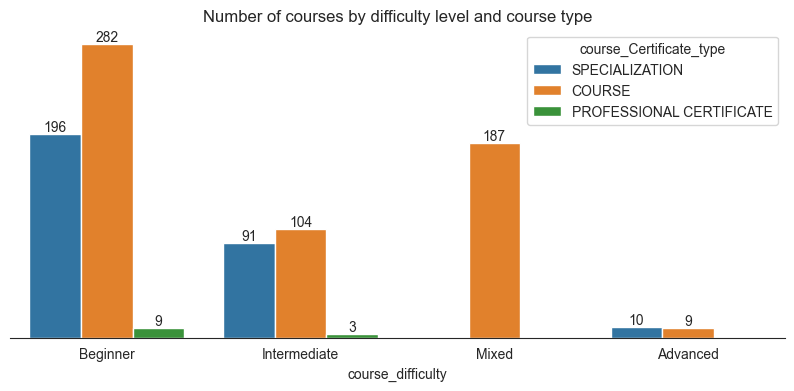

In [87]:
sns.set_style('white')
plt.figure(figsize=(10, 4))

ax = sns.countplot(df, x='course_difficulty', hue='course_Certificate_type')
ax.set_yticklabels([])
plt.ylabel('')
plt.title('Number of courses by difficulty level and course type')
sns.despine(left=True, top=True, right=True)

for container in ax.containers:
    ax.bar_label(container)

plt.show()  


**Findings:**<br>
&#9658; Half of courses (55%) are Beginner courses on Coursera <br>
&#9658; Most courses are classified as either 'course' (65%) or 'specialization' (33%) <br>
&#9658; Very low levels of advanced courses or professional certificates

<div style="font-size:120%;color:#8e9890;font-weight:500; font-style:italic">▶️ Course levels by availability versus enrollment</div>


Text(0.5, 1.0, 'Average enrollments in courses by level')

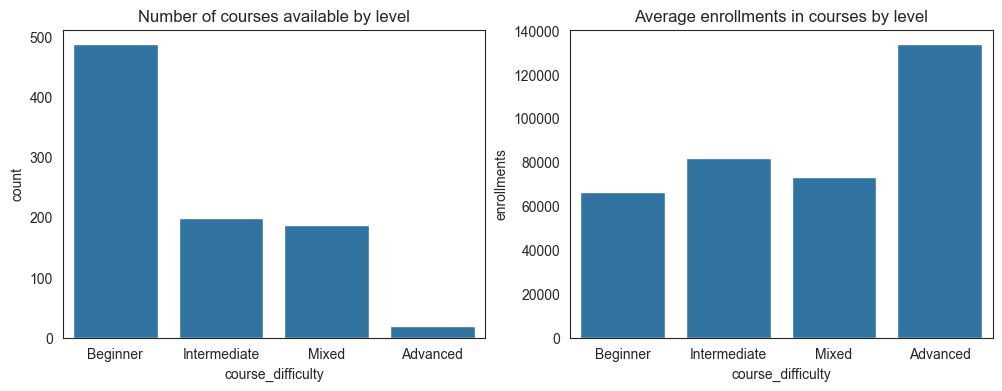

In [88]:
sns.set_style('white')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

sns.barplot(data=df_level, x='course_difficulty', y='count', ax=axes[0])
axes[0].set_title('Number of courses available by level')

sns.barplot(data=df_level, x='course_difficulty', y='enrollments', ax=axes[1])
axes[1].set_title('Average enrollments in courses by level')



**Findings:**<br>
&#9658; Despite more Beginner courses available, the average enrollments in other course levels is about the same or even higher. This could indicate that while availability for Beginner courses is higher, the demand for other course levels is similar or even higher (e.g. Advanced courses)<br>


<div style="font-size:120%;color:#8e9890;font-weight:500; font-style:italic">▶️ Course types by availability versus enrollment</div>


/var/folders/j6/b6gh915d113fbv3bgzvphpj40000gn/T/ipykernel_14282/2601056466.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
/var/folders/j6/b6gh915d113fbv3bgzvphpj40000gn/T/ipykernel_14282/2601056466.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


[Text(0, 0, 'COURSE'),
 Text(1, 0, 'SPECIALIZATION'),
 Text(2, 0, 'PROFESSIONAL CERTIFICATE')]

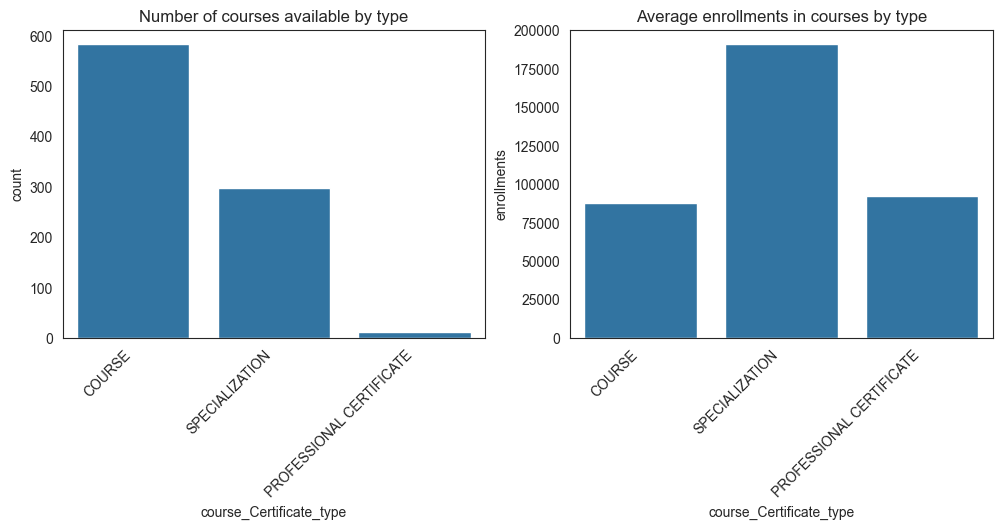

In [89]:
sns.set_style('white')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

sns.barplot(data=df_type, x='course_Certificate_type', y='count', ax=axes[0])
axes[0].set_title('Number of courses available by type')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


sns.barplot(data=df_type, x='course_Certificate_type', y='enrollments', ax=axes[1])
axes[1].set_title('Average enrollments in courses by type')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


**Findings:**<br>
&#9658; Although 'COURSE' type is the most available, average enrollments are about the same for 'Professional Certificate' and 'Specialisation'. This may indicate that also for course types similar or even higher demand exists for course types that are not as available. 

<div style="font-size:120%;color:#8e9890;font-weight:500; font-style:italic">▶️ Top courses by enrollments and ratings</div>

In [90]:
top_10_courses = df.sort_values('course_students_enrolled', ascending=False).head(10)
top_10_courses

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
6,Machine Learning,Stanford University,COURSE,4.90,Mixed,3200000
2,The Science of Well-Being,Yale University,COURSE,4.90,Mixed,2500000
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.80,Beginner,1500000
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.80,Mixed,1300000
13,Data Science,Johns Hopkins University,SPECIALIZATION,4.50,Beginner,830000
44,Career Success,"University of California, Irvine",SPECIALIZATION,4.40,Beginner,790000
175,English for Career Development,University of Pennsylvania,COURSE,4.80,Mixed,760000
40,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.80,Mixed,750000
15,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,4.60,Beginner,740000
5,Deep Learning,deeplearning.ai,SPECIALIZATION,4.80,Intermediate,690000


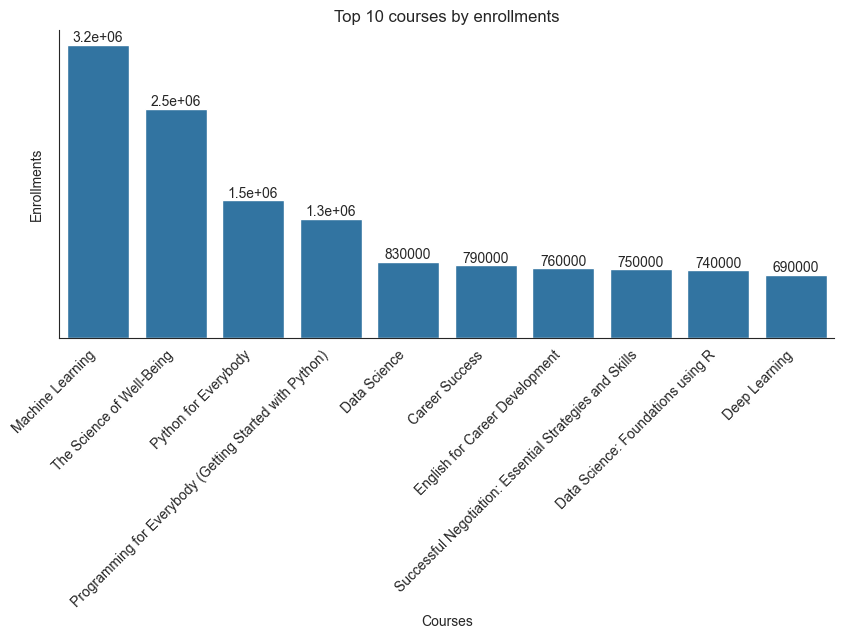

In [91]:
sns.set_style('white')
plt.figure(figsize=(10, 4))

ax = sns.barplot(top_10_courses, x='course_title', y='course_students_enrolled')
ax.bar_label(ax.containers[0])
plt.title('Top 10 courses by enrollments')
plt.xlabel('Courses')
plt.ylabel('Enrollments')
plt.xticks(rotation=45, ha='right')
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()  

**Findings:**<br>
&#9658; 6/10 top courses are about data science or programming. <br>
&#9658; Other courses in the top 10 are about wellbeing or career development. 

In [92]:
df.sort_values('course_rating', ascending=False).head(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.00,Beginner,1500
401,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.00,Intermediate,1600
156,Искусство разработки на современном C++,E-Learning Development Fund,SPECIALIZATION,4.90,Intermediate,68000
538,Getting Started with SAS Programming,SAS,COURSE,4.90,Beginner,22000
500,Understanding Einstein: The Special Theory of ...,Stanford University,COURSE,4.90,Beginner,89000
69,Writing in the Sciences,Stanford University,COURSE,4.90,Beginner,140000
524,The Science of Training Young Athletes,University of Florida,COURSE,4.90,Beginner,13000
846,Agile и Scrum в работе над проектами и продуктами,ScrumTrek,COURSE,4.90,Beginner,12000
438,Troubles du spectre de l'autisme : diagnostic,University of Geneva,COURSE,4.90,Intermediate,5400
551,Aprendiendo a aprender: Poderosas herramientas...,University of California San Diego,COURSE,4.90,Beginner,180000


**Findings:**<br>
&#9658; Courses with highest enrollments tend to come from well-known organizations (e.g. Yale University, Stanford University) and organizations with high number of courses (e.g. University of Michigan, John Hopkins University, University of Pensylvania)  <br>
&#9658; Courses with highest ratings often also have lower number of enrollments and are more specialized courses <br>

<div style="font-size:120%;color:#8e9890;font-weight:500; font-style:italic">▶️ Course ratings</div>

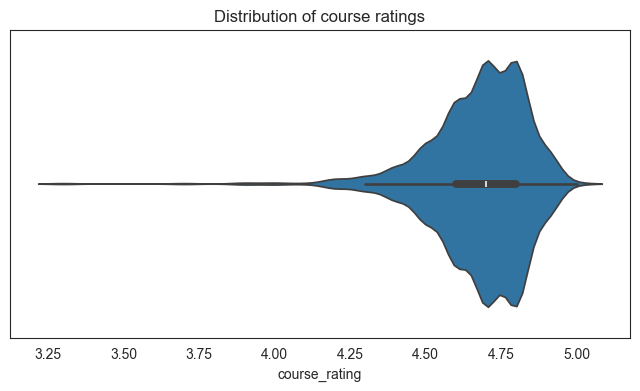

In [93]:
sns.set_style('white')
plt.figure(figsize=(8, 4))

ax = sns.violinplot(x=df['course_rating'])
plt.title('Distribution of course ratings')
plt.show()


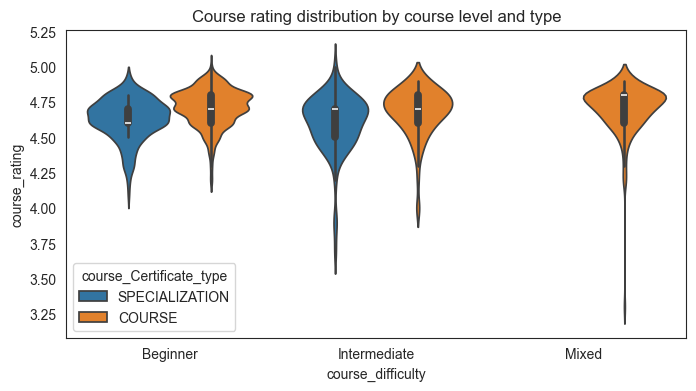

In [94]:
# Removing course types and course levels with low counts
difficulty_filter = ['Beginner', 'Intermediate', 'Mixed']
certificate_filter = ['SPECIALIZATION', 'COURSE']
filtered_df = df[df['course_difficulty'].isin(difficulty_filter) & df['course_Certificate_type'].isin(certificate_filter)]

sns.set_style('white')
plt.figure(figsize=(8, 4))

sns.violinplot(data=filtered_df, x='course_difficulty', y='course_rating', hue='course_Certificate_type')
plt.title('Course rating distribution by course level and type')
plt.show()

In [106]:
means_levels = df.groupby('course_difficulty')['course_rating'].mean().sort_values(ascending=False)
means_levels

course_difficulty
Mixed          4.71
Beginner       4.68
Intermediate   4.65
Advanced       4.60
Name: course_rating, dtype: float64

In [107]:
means_types = df.groupby('course_Certificate_type')['course_rating'].mean().sort_values(ascending=False)
means_types

course_Certificate_type
COURSE                     4.71
PROFESSIONAL CERTIFICATE   4.70
SPECIALIZATION             4.62
Name: course_rating, dtype: float64

**Findings:**<br>
&#9658; All courses generally have a high average rating. <br>
&#9658; Courses classified as 'COURSE' tend to have slightly higher average ratings than 'SPECIALIZATION'<br>
&#9658; Mixed courses have a higher average rating than Beginner & Intermmediate courses.

<a id="33"></a>
### **3.3. Correlations**

<div style="font-size:120%;color:#8e9890;font-weight:500; font-style:italic">▶️ Investigating correlations between course ratings, number of courses and enrollments</div>

In [95]:
# Creating a new dataframe for all organizations with course counts, average course ratings, total enrollments & enrollments per course
org_counts_ratings = df.groupby('course_organization').agg(
    course_count=('course_organization', 'size'),
    mean_rating=('course_rating', 'mean'),
    sum_enrollments=('course_students_enrolled', 'sum')
)
org_counts_ratings['enrollment_per_course'] = (org_counts_ratings['sum_enrollments'] / org_counts_ratings['course_count']).round(0).astype(int)


org_counts_ratings.reset_index()

,course_organization,course_count,mean_rating,sum_enrollments,enrollment_per_course
0,(ISC)²,3,4.73,9900,3300
1,Amazon Web Services,6,4.55,364000,60667
2,American Institute of Business and Economics,1,4.40,11000,11000
3,American Museum of Natural History,2,4.75,30000,15000
4,Arizona State University,7,4.77,589500,84214
...,...,...,...,...,...
149,Yonsei University,4,4.75,563000,140750
150,deeplearning.ai,16,4.74,2863400,178962
151,École Polytechnique,1,4.80,190000,190000
152,École Polytechnique Fédérale de Lausanne,4,4.72,471000,117750


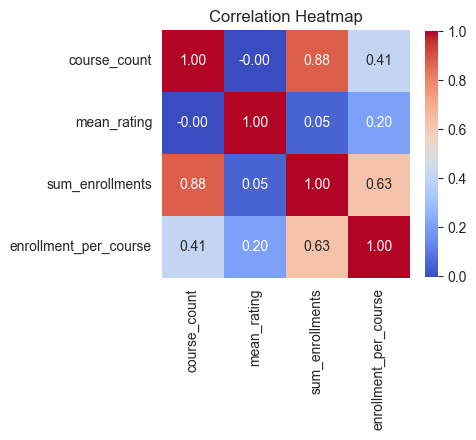

In [96]:
corr_matrix = org_counts_ratings.corr()

plt.figure(figsize=(4, 4))
sns.heatmap(
    corr_matrix,
    fmt=".2f",
    annot=True,
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Heatmap")
plt.show()

**Correlation coefficient metrics:** <br>
-1: perfectly negatively correlated<br>
1: perfectly positively correlated 

The correlation coefficient between number of courses and course rating is 0 or very close to 0 (-0.00), so no correlation seems to exist between number of courses and course ratings. <br>
<br>
A low positive correlation exists between number of courses and enrollment per course (0.41). Organizations with more courses in the catalogue also seem to have higher enrollments on average. Average enrollment also has a low positive correlation to average course ratings (0.20). This makes sense, as courses with higher ratings may attract more people to enroll. 
<br>
<br>
**Findings:** <br>
&#9658; No correlation between number of courses and course rating<br>
&#9658; Low positive correlation between number of courses and average enrollment per course (0.41)<br>
&#9658; Low positive correlation between average enrollment per course and average course ratings (0.20)<br>


<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#B2BEB5;overflow:hidden;font-weight:500">Findings & Insights</div>

<a id="4"></a>
## 💡 4. Findings & Insights



### **4.1. Key Findings**

&#9658; Most organizations on Coursera (32%) have only 1 course in the catalogue.<br>
&#9658; Top 10 organizations with the most courses are 80% universities and 20% well-known companies (IBM, Google Cloud)<br>
&#9658; Organizations with highest enrollments per course are either well-known universities with many courses (e.g. Stanford, Yale), or organizations with just one or two courses being very popular. These tend to be niche courses in terms of topic. <br>
&#9658; Organizations with highest average course ratings are largely those with just one course published (top 7). These courses tend to also be more niche, specialized and some not in English.<br>
&#9658; No correlation exists between number of courses and course ratings.<br>
&#9658; A low to moderate correlation exists between number of courses and average enrollment per course (0.41). With more presence and availability on the platform, organizations therefore seem to attract more student enrollments.<br>
&#9658;A low correlation exists between average enrollments per course and average course ratings (0.20). More students enrolled in courses positively impacts course ratings to a low extent. <br>
&#9658; 55% of courses are 'Beginner' level courses which are most widely available. <br>
&#9658; Low availability of 'Advanced' level courses (2%) and 'Prefessional certificate' courses (1%). <br>
&#9658; However, average enrollments in Advanced courses are almost double than for Beginner courses. There may be a mismatch of availability and demand.<br>
&#9658; Also for 'Professional Certificate' courses, the average enrollments are on par with 'normal' courses, while availability is lower. <br>
&#9658; Most popular courses are about data science & programming (60%), wellbeing (10%) and career development (30%)<br>
&#9658; All courses have an overall high average course rating of 4.7. <br>
<br>
### **4.2. Business Insights**
_Based on the key findings above, we ask 'so, what?'. What are the insights we can derive and what may they mean from a business perspective?<br>
In this scenario, we'll take the perspective of an organization wanting to launch a course on Coursera._
<br>
<br>
&#9658; High course ratings are not correlated with having more courses available. A high course rating can also be achieved with just one, potentially niche course as a less well-known organization. <br>
&#9658; If the goal is to raise awareness of the organization, having more courses in the catalogue could be a strategy. Organizations with more courses tend to have more enrollments per course. More students enrolled in courses tend, to a low extent, also lead to better course ratings.<br>
&#9658; Most popular courses are about data science & programming (60%), wellbeing (10%) and career development (30%)<br>
&#9658; There may be an opportunity to focus on offering course types with low current availability (Advanced, Professional Certificate) that still show equal or higher demand to more widely available courses. 



<a id="43"></a>
### **4.3. Further analysis possibilities**
- Statistical significance tests of average ratings between course levels and types
- Deeper statistical driver analysis of what drives or is mostly correlated to a) course ratings and b) enrollments 